In [1]:
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"  # Silêncio TensorFlow!

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras  # type: ignore

# Verificar se a GPU está disponível
device = "GPU" if tf.config.list_physical_devices("GPU") else "CPU"
print(f"Usando o dispositivo: {device}")


E0000 00:00:1743002454.594215   57400 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743002454.601000   57400 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1743002454.618338   57400 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1743002454.618361   57400 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1743002454.618363   57400 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1743002454.618365   57400 computation_placer.cc:177] computation placer already registered. Please check linka

Usando o dispositivo: CPU


Resultados:
O Tensorflow levou 49.356s para treinar o modelo usando a CPU.
Tipo dos tensores usados:
X: <dtype: 'float64'>
y: <dtype: 'float64'>
y_pred: float32

Gráfico dos resultados:


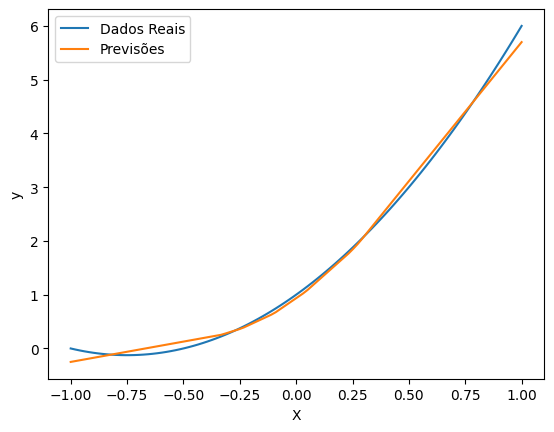

In [2]:
# Para contar o tempo de execução
import time

start_time = time.time()


# Geração de dados
def f(X):
    return 2 * X**2 + 3 * X + 1


X = tf.linspace(-1, 1, 100)
y = f(X)

# Construção do modelo
model = keras.Sequential(
    [
        keras.Input((1,)),
        keras.layers.Dense(20, activation="relu"),
        keras.layers.Dense(1),
    ]
)

# Compilar o modelo
model.compile(optimizer="adam", loss="mse")

# Treinamento do modelo usando model.fit
model.fit(X, y, epochs=1000, verbose=0)

# Avaliação do modelo
y_pred = model.predict(X, verbose=0)


execution_time = time.time() - start_time

# Imprimindo resultados do Benchmark
print("Resultados:")
print(
    f"O Tensorflow levou {execution_time:.3f}s para treinar o modelo usando a {device}."
)
print("Tipo dos tensores usados:")
print("X:", X.dtype)
print("y:", y.dtype)
print("y_pred:", y_pred.dtype)
print()

# Plotar os resultados do treinamento
print("Gráfico dos resultados:")
plt.plot(X, y, label="Dados Reais")
plt.plot(X, y_pred, label="Previsões")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()
